In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


In [10]:
df = pd.read_excel('C:/Users/User/Desktop/Data_Analyst/Mall_Customers.xlsx')

In [11]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


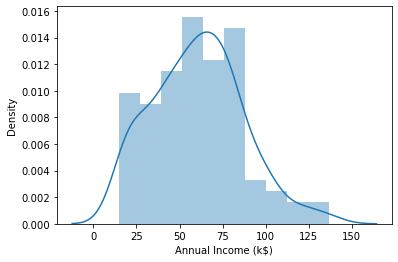

In [15]:
sns.distplot(df['Annual Income (k$)']);

In [17]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

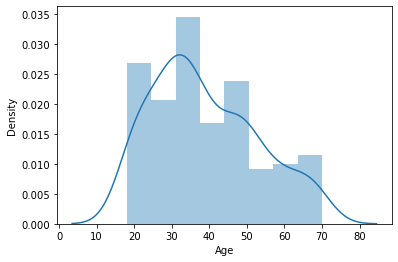

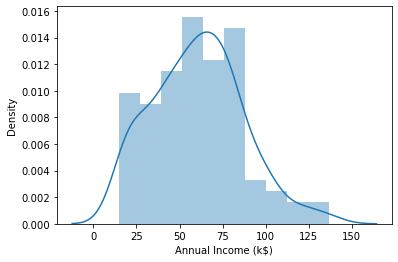

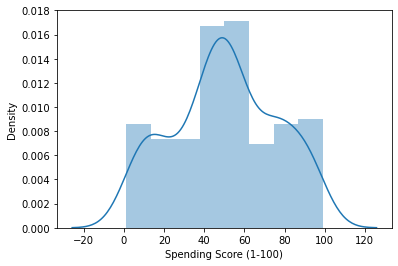

In [18]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.distplot(df[i]);

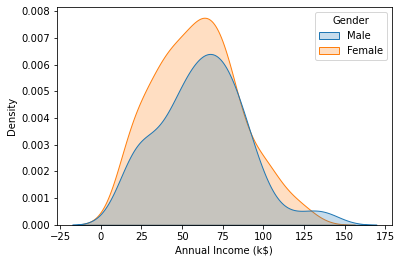

In [23]:
sns.kdeplot(df['Annual Income (k$)'], shade = True, hue = df['Gender']);

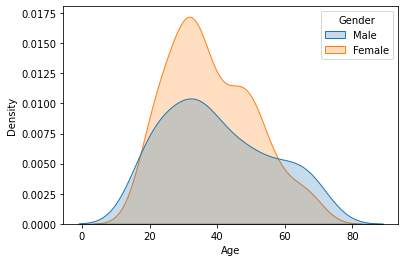

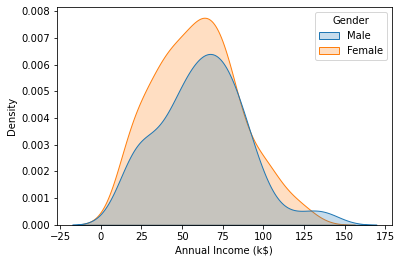

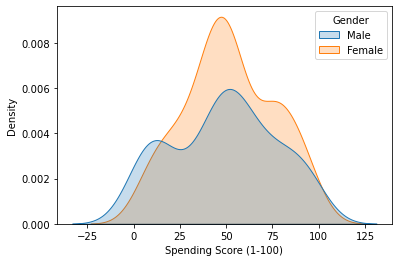

In [24]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.kdeplot(df[i], shade = True, hue = df['Gender']);

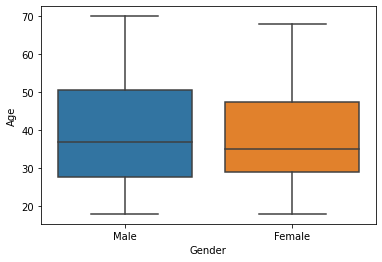

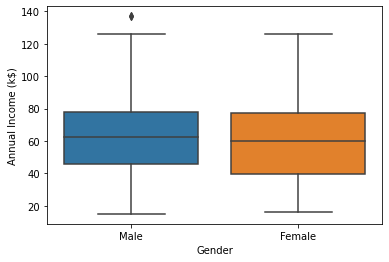

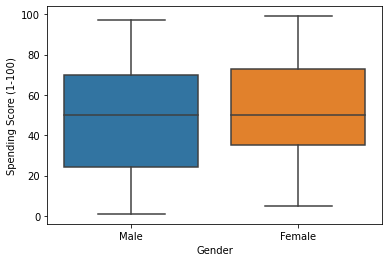

In [26]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.boxplot(data = df, x = 'Gender', y = df[i]);

In [32]:
df['Gender'].value_counts(normalize = True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

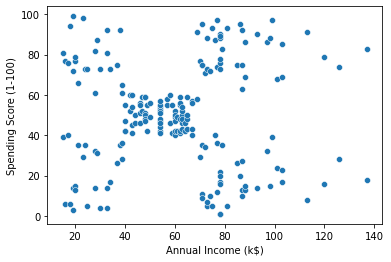

In [34]:
sns.scatterplot(data = df, x ='Annual Income (k$)', y ='Spending Score (1-100)');

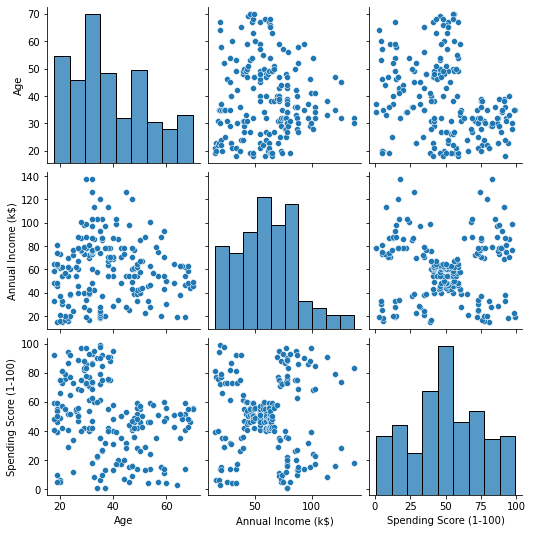

In [37]:
df = df.drop('CustomerID', axis=1)
sns.pairplot(df)

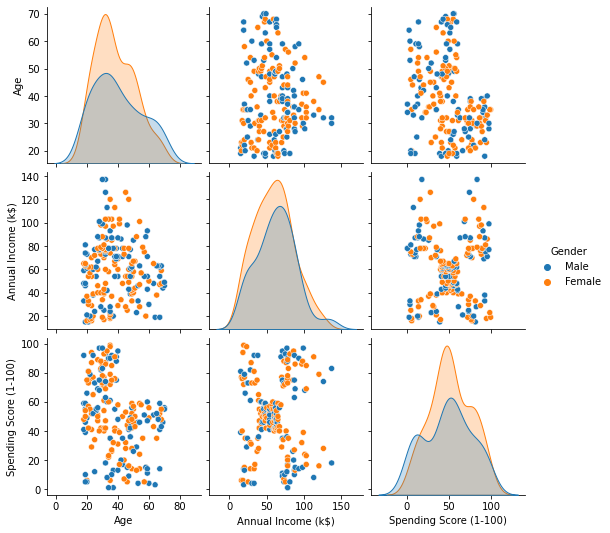

In [39]:
sns.pairplot(df, hue = 'Gender');

In [40]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [41]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


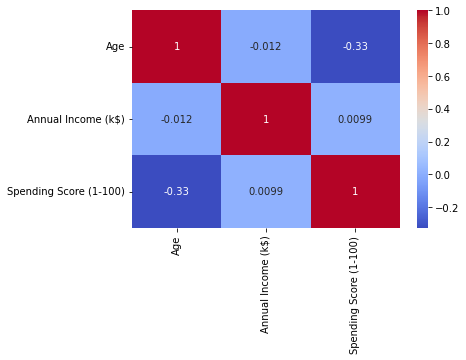

In [46]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm');


# Clustering - Univariate, Bivariate, Multivariate

In [65]:
clustering1 = KMeans(n_clusters = 3)

In [66]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [67]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [68]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [69]:
df['Income Cluster'].value_counts()

2    90
0    74
1    36
Name: Income Cluster, dtype: int64

In [70]:
clustering1.inertia_

23517.33093093092

In [71]:
inertia_scores = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)
    

In [72]:
inertia_scores

[137277.2800000002,
 48660.88888888887,
 23517.33093093092,
 13278.112713472474,
 8481.49619047619,
 5050.904761904766,
 3931.9880952380995,
 2822.4996947496957,
 2208.8120490620495,
 1891.4914502164506]

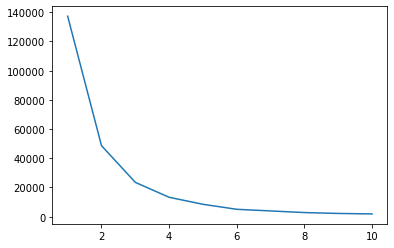

In [76]:
plt.plot(range(1,11), inertia_scores)

In [77]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [78]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


In [81]:
clustering2 = KMeans(n_clusters = 5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

df['Spending and Income Cluster'] = clustering2.labels_
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,3
1,Male,21,15,81,0,2
2,Female,20,16,6,0,3
3,Female,23,16,77,0,2
4,Female,31,17,40,0,3


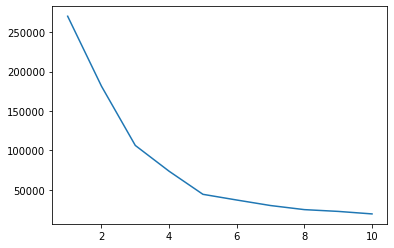

In [82]:
inertia_scores2 = []

for i in range(1,11):
    kmeans2 = KMeans(n_clusters = i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

plt.plot(range(1,11), inertia_scores2)

In [89]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

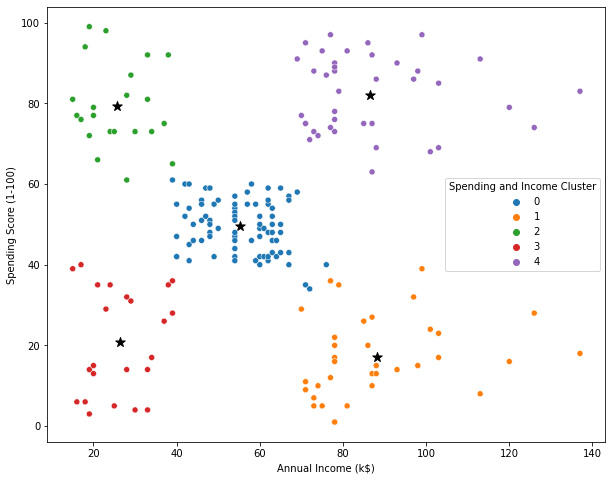

In [90]:
plt.figure(figsize =(10,8))
plt.scatter(x = centers['x'], y = centers['y'], s=100, c='black', marker='*')

sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', 
                hue = 'Spending and Income Cluster', palette = 'tab10')

plt.savefig('clustering_biv.png')

In [92]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize = 'index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.457143,0.542857
2,0.590909,0.409091
3,0.608696,0.391304
4,0.538462,0.461538


In [94]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)', 
                                          'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,25.272727,25.727273,79.363636
3,45.217391,26.304348,20.913043
4,32.692308,86.538462,82.128205


In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scale = StandardScaler()

In [97]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,3
1,Male,21,15,81,0,2
2,Female,20,16,6,0,3
3,Female,23,16,77,0,2
4,Female,31,17,40,0,3


In [99]:
dff = pd.get_dummies(df, drop_first = True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,0,3,1
1,21,15,81,0,2,1
2,20,16,6,0,3,0
3,23,16,77,0,2,0
4,31,17,40,0,3,0


In [100]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [101]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [104]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


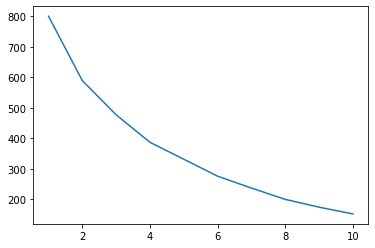

In [105]:
inertia_scores3 = []

for i in range(1,11):
    kmeans3 = KMeans(n_clusters = i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)

plt.plot(range(1,11), inertia_scores3)

In [106]:
df


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,3
1,Male,21,15,81,0,2
2,Female,20,16,6,0,3
3,Female,23,16,77,0,2
4,Female,31,17,40,0,3
...,...,...,...,...,...,...
195,Female,35,120,79,1,4
196,Female,45,126,28,1,1
197,Male,32,126,74,1,4
198,Male,32,137,18,1,1


In [ ]:
df.to_csv('Clustering.csv')